<a href="https://colab.research.google.com/github/dzeaulfath/Python/blob/main/credit_risk_analysis_eda_statistics_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/dzeaulfath/Python/blob/main/DataSet/credit_risk_dataset.csv.zip?raw=true

--2023-04-20 07:33:11--  https://github.com/dzeaulfath/Python/blob/main/DataSet/credit_risk_dataset.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dzeaulfath/Python/raw/main/DataSet/credit_risk_dataset.csv.zip [following]
--2023-04-20 07:33:11--  https://github.com/dzeaulfath/Python/raw/main/DataSet/credit_risk_dataset.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dzeaulfath/Python/main/DataSet/credit_risk_dataset.csv.zip [following]
--2023-04-20 07:33:11--  https://raw.githubusercontent.com/dzeaulfath/Python/main/DataSet/credit_risk_dataset.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githu

In [ ]:
!unzip /content/credit_risk_dataset.csv.zip?raw=true

Archive:  /content/credit_risk_dataset.csv.zip?raw=true
  inflating: credit_risk_dataset.csv  


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo

from sklearn.feature_selection import VarianceThreshold

import missingno as msno

import os
import io
import requests
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/credit_risk_dataset.csv", skipinitialspace = True)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
x = df.drop(labels = ["loan_status"], axis = 1)
y = df["loan_status"]

df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(include=['object','category'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
person_age,32581.0,27.734600,6.348078,20.00,22.00,22.00,23.00,26.00,30.00,32.00,36.000,40.00,50.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,22880.00,28590.00,38500.00,55000.00,79200.00,86000.00,110004.000,138000.00,225200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,0.00,0.00,2.00,4.00,7.00,8.00,10.000,13.00,18.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,2000.00,3000.00,5000.00,8000.00,12200.00,14500.00,19000.000,24000.00,29800.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,6.03,6.91,7.90,10.99,13.47,13.92,15.298,16.32,18.62,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.000,1.00,1.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.04,0.05,0.09,0.15,0.23,0.25,0.320,0.38,0.50,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,2.00,2.00,3.00,4.00,8.00,9.00,11.000,14.00,17.00,30.00


# Target Variable

In [ ]:
df["loan_status"].describe()

count    32581.000000
mean         0.218164
std          0.413006
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [ ]:
df.loan_status.value_counts() / len(df) * 100

0    78.183604
1    21.816396
Name: loan_status, dtype: float64

In [ ]:
ex.pie(df,names='loan_status',title='Propotion Of Loan Status',hole=0.33)

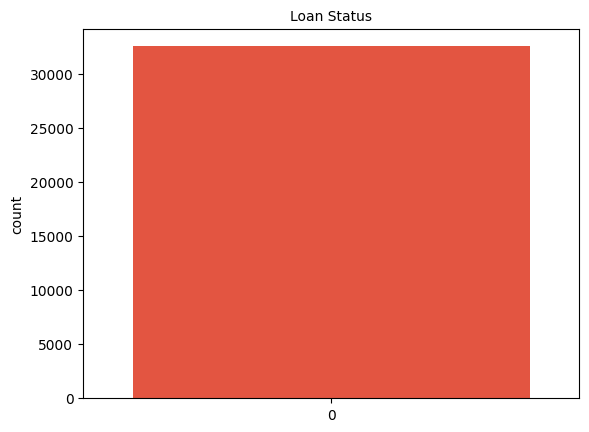

In [ ]:
sns.countplot(df["loan_status"], palette='CMRmap')
plt.title("Loan Status",fontsize=10)
plt.show()

Text(0, 0.5, 'Loan Percent Income')

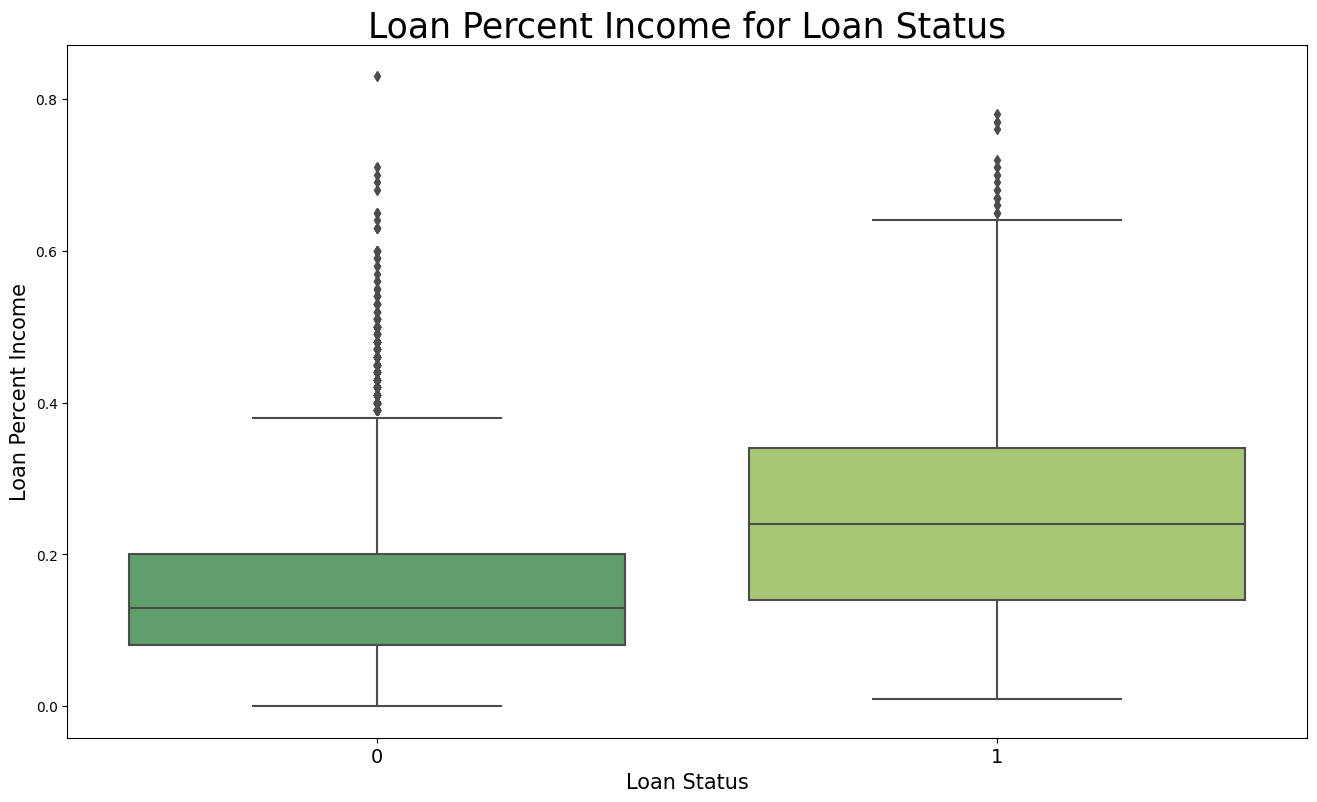

In [ ]:
x = df[["loan_status", "loan_percent_income"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "loan_status", y = "loan_percent_income", data = x, palette = 'summer');

plt.title('Loan Percent Income for Loan Status', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Loan Status", fontsize = 15)
plt.ylabel("Loan Percent Income", fontsize = 15)

In [ ]:
cor_target = df.corrwith(df["loan_status"])
cor_target.sort_values(axis = 0, ascending = False)

loan_status                   1.000000
loan_percent_income           0.379366
loan_int_rate                 0.335133
loan_amnt                     0.105376
cb_person_cred_hist_length   -0.015529
person_age                   -0.021629
person_emp_length            -0.082489
person_income                -0.144449
dtype: float64

# Categorical Variables

In [ ]:
df.describe(include = "O").T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [ ]:
df.select_dtypes(include=['object','category']).columns.tolist()

df_cat = df.select_dtypes(include=['object','category'])
df_cat.count()

person_home_ownership        32581
loan_intent                  32581
loan_grade                   32581
cb_person_default_on_file    32581
dtype: int64

In [ ]:
ex.pie(df,names='person_home_ownership',title='Propotion Of Person Home Ownership',hole=0.33)

In [ ]:
ex.pie(df,names='loan_intent',title='Propotion Of Loan Intent',hole=0.33)

In [ ]:
ex.pie(df,names='loan_grade',title='Propotion Of Loan Grade',hole=0.33)

In [ ]:
ex.pie(df,names='cb_person_default_on_file',title='Propotion Of CB Person Default On File',hole=0.33)

In [ ]:
cat_col = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]
df[cat_col].mode()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,EDUCATION,A,N


<AxesSubplot:xlabel='cb_person_default_on_file', ylabel='count'>

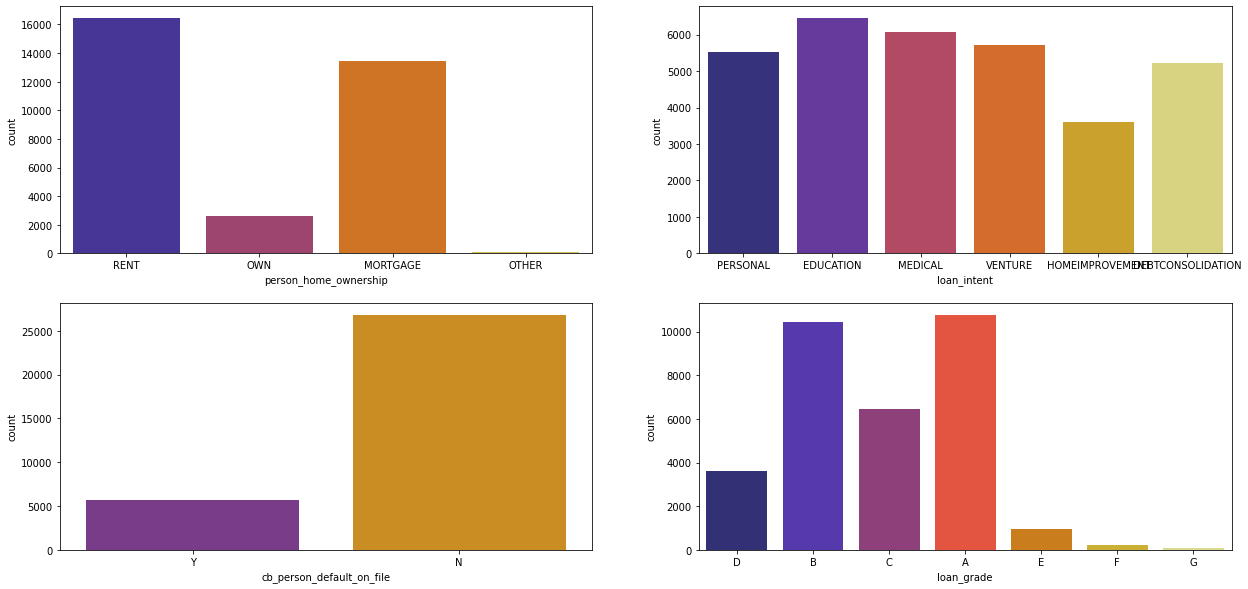

In [ ]:
fig,axes = plt.subplots(2,2, figsize=(21,10))

sns.countplot('person_home_ownership',data=df,ax=axes[0,0],palette='CMRmap')
sns.countplot('loan_intent',data=df,ax=axes[0,1],palette='CMRmap')
sns.countplot('loan_grade',data=df,ax=axes[1,1],palette='CMRmap')
sns.countplot('cb_person_default_on_file',data=df,ax=axes[1,0],palette='CMRmap')

<AxesSubplot:xlabel='cb_person_default_on_file', ylabel='count'>

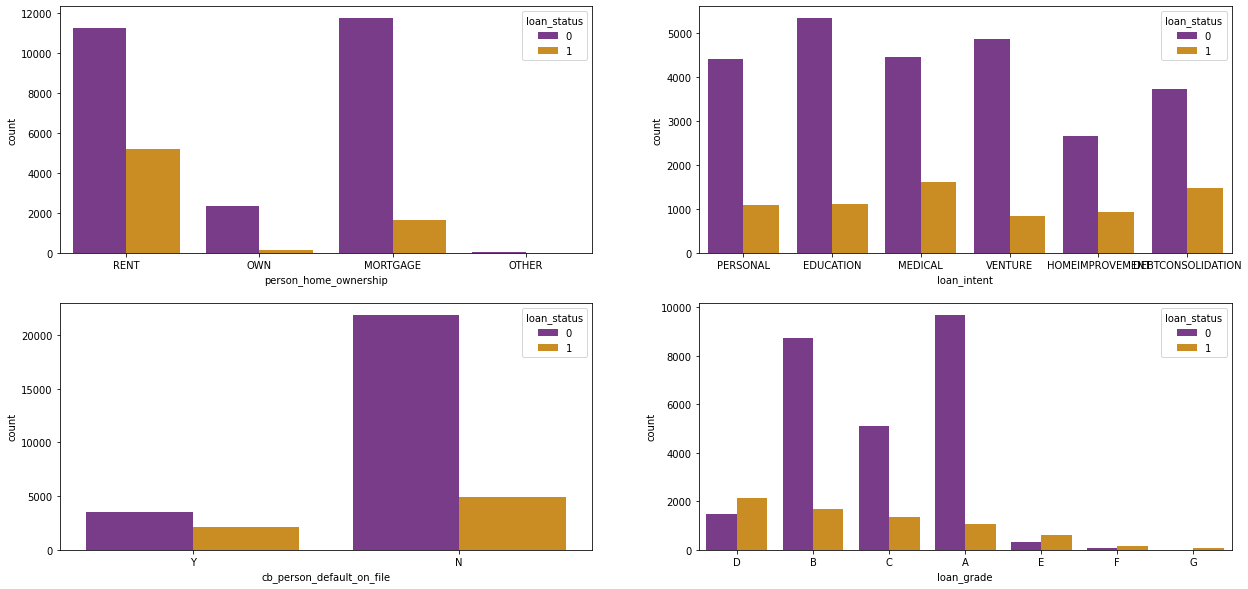

In [ ]:


fig,axes = plt.subplots(2,2, figsize=(21,10))

sns.countplot('person_home_ownership',hue="loan_status",data=df,ax=axes[0,0],palette='CMRmap')
sns.countplot('loan_intent',data=df,hue="loan_status",ax=axes[0,1],palette='CMRmap')
sns.countplot('loan_grade',data=df,hue="loan_status",ax=axes[1,1],palette='CMRmap')
sns.countplot('cb_person_default_on_file',hue="loan_status",data=df,ax=axes[1,0],palette='CMRmap')

# Statistics

In [ ]:
df_num.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.73,6.35,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.85,61983.12,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.79,4.14,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.37,6322.09,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.01,3.24,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.22,0.41,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.17,0.11,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.80,4.06,2.00,3.00,4.00,8.00,30.00


In [ ]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
percent_missing = (df.isnull().sum().sort_values(ascending = False) * 100 / len(df)).round(2)
percent_missing

loan_int_rate                 9.56
person_emp_length             2.75
person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

<AxesSubplot:>

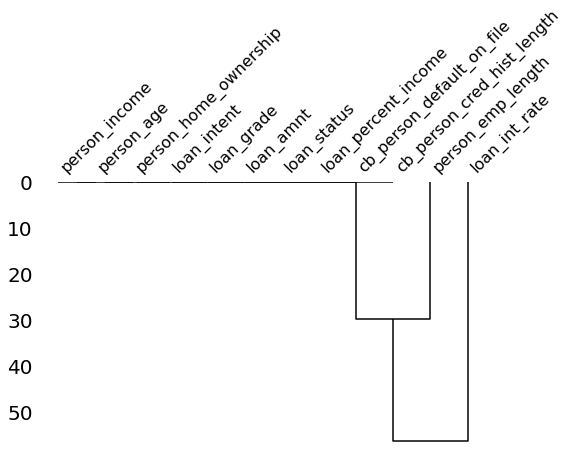

In [ ]:
msno.dendrogram(df, figsize = (8, 5))

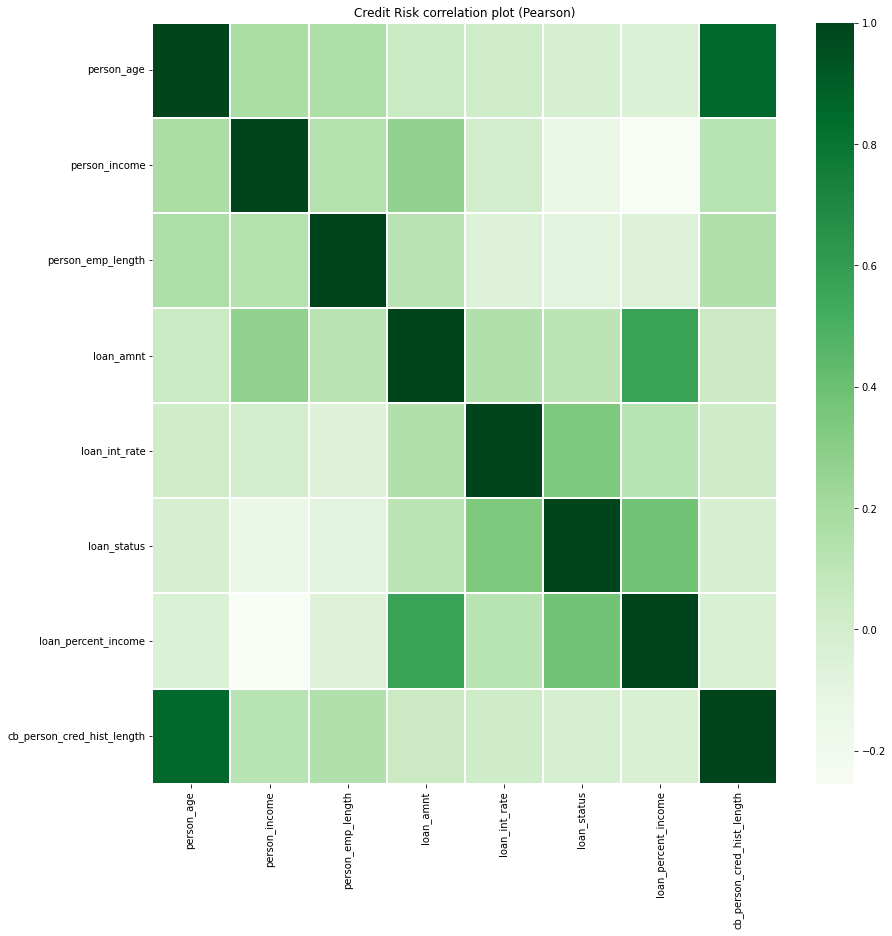

In [ ]:
plt.figure(figsize = (14,14))
plt.title('Credit Risk correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens")
plt.show()

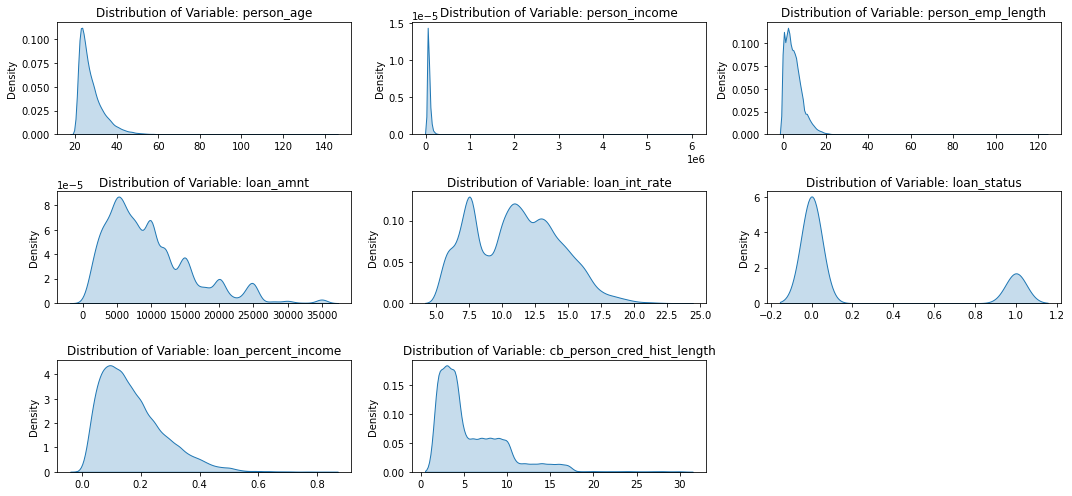

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 7), sharex = False, sharey = False)
axes = axes.ravel()  
cols = df_num.columns[:]

for col, ax in zip(cols, axes):
    data = df_num 
    sns.kdeplot(data=data, x=col, shade=True, ax=ax)
    ax.set(title=f'Distribution of Variable: {col}', xlabel=None)
    
fig.delaxes(axes[8])
fig.tight_layout()
plt.show()

In [ ]:
df_num.skew()

person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

In [ ]:
df_num.kurtosis()

person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64

In [ ]:
constant_selector= VarianceThreshold(threshold = 0)
constant_selector.fit(df_num)

VarianceThreshold(threshold=0)

In [ ]:
constant_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
sum(constant_selector.get_support())

8

In [ ]:
constant_columns = [column for column in df_num.columns
                    if column not in df_num.columns[constant_selector.get_support()]]

print(len(constant_columns))

0


In [ ]:
quasi_constant_selector = VarianceThreshold(threshold = 0.01) 

quasi_constant_selector.fit(df_num)

VarianceThreshold(threshold=0.01)

In [ ]:
quasi_constant_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
quasi_constant_columns = [column for column in df_num.columns
                    if column not in df_num.columns[quasi_constant_selector.get_support()]]

print(len(quasi_constant_columns))

0


In [ ]:
percentile_25 = df_num["person_age"].quantile(0.25)
percentile_75 = df_num["person_age"].quantile(0.75)

percentile_25
percentile_75      

iqr = percentile_75 - percentile_25
iqr

upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr

upper_limit   
lower_limit

12.5

In [ ]:
df_num[df_num["person_age"] > upper_limit]   
df_num[df_num["person_age"] < lower_limit]

IQR_outliers = df_num[(df_num.person_age <= lower_limit) | (df_num.person_age >= upper_limit)]
IQR_outliers

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
81,144,250000,4.0,4800,13.57,0,0.02,3
183,144,200000,4.0,6000,11.86,0,0.03,2
575,123,80004,2.0,20400,10.25,0,0.25,3
747,123,78000,7.0,20000,NaN,0,0.26,4
29121,50,900000,11.0,30000,12.69,0,0.03,15
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [ ]:
upper_bound = df_num["person_age"].quantile(0.99)  
lower_bound = df_num["person_age"].quantile(0.01)  

upper_bound
lower_bound

21.0

<AxesSubplot:xlabel='person_age'>

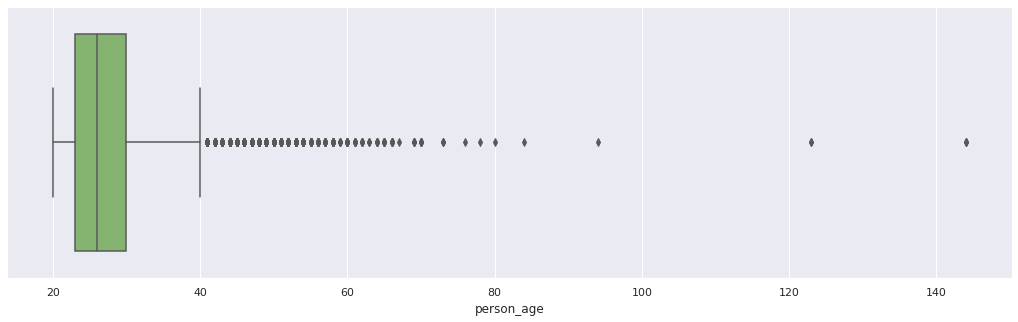

In [ ]:
sns.set(rc = {"figure.figsize" : (18,5)})

sns.boxplot(df_num["person_age"], palette="summer")

<AxesSubplot:xlabel='person_income'>

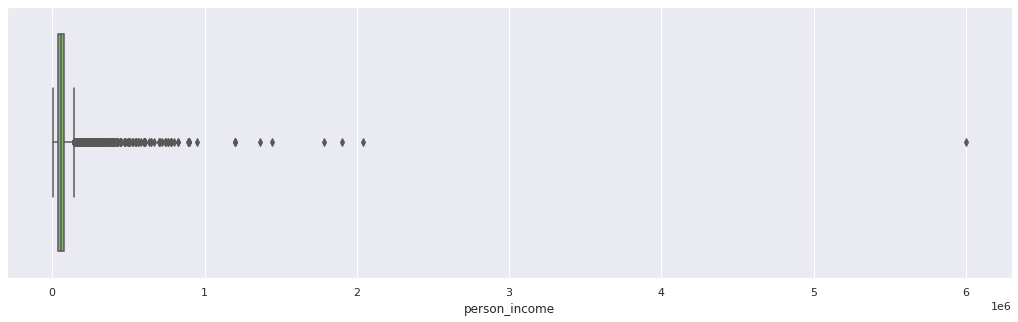

In [ ]:
sns.boxplot(df_num["person_income"], palette="summer")

<AxesSubplot:xlabel='person_emp_length'>

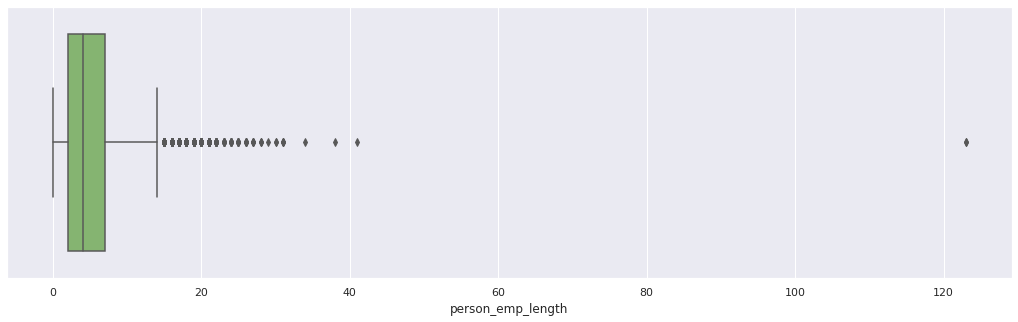

In [ ]:
sns.boxplot(df_num["person_emp_length"], palette="summer")

<AxesSubplot:xlabel='loan_amnt'>

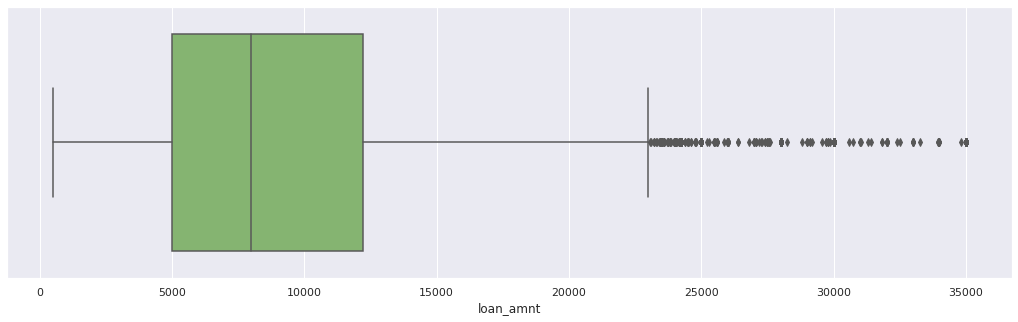

In [ ]:
sns.boxplot(df_num["loan_amnt"], palette="summer")

<AxesSubplot:xlabel='loan_int_rate'>

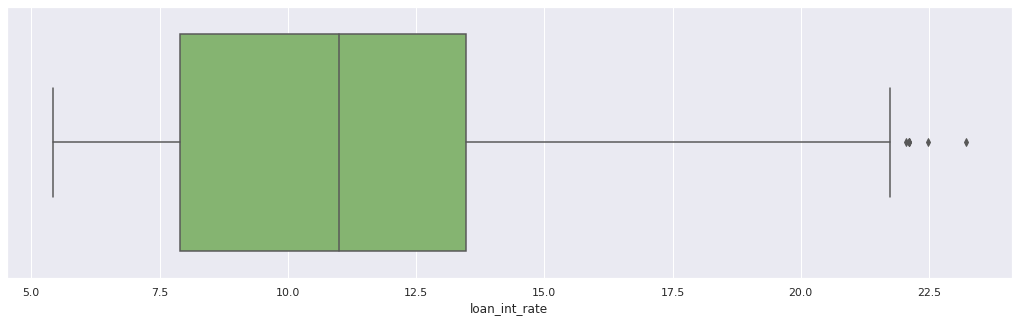

In [ ]:
sns.boxplot(df_num["loan_int_rate"], palette="summer")

<AxesSubplot:xlabel='loan_percent_income'>

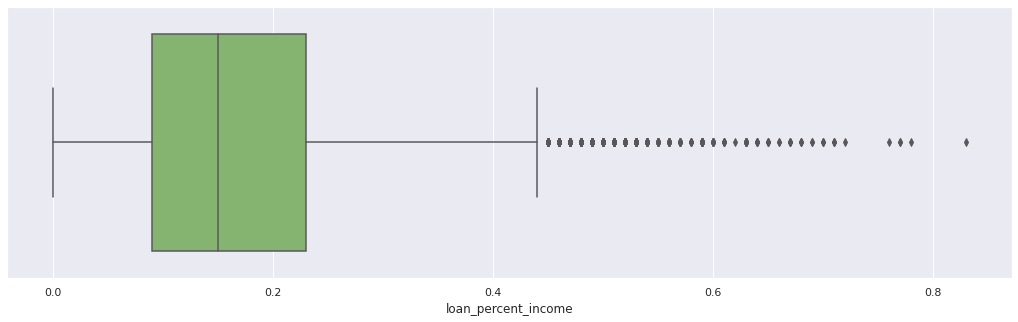

In [ ]:
sns.boxplot(df_num["loan_percent_income"], palette="summer")

<AxesSubplot:xlabel='cb_person_cred_hist_length'>

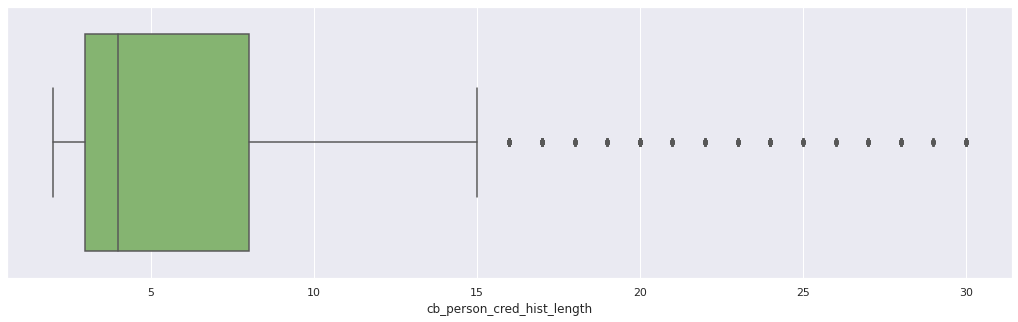

In [ ]:
sns.boxplot(df_num["cb_person_cred_hist_length"],palette="summer")

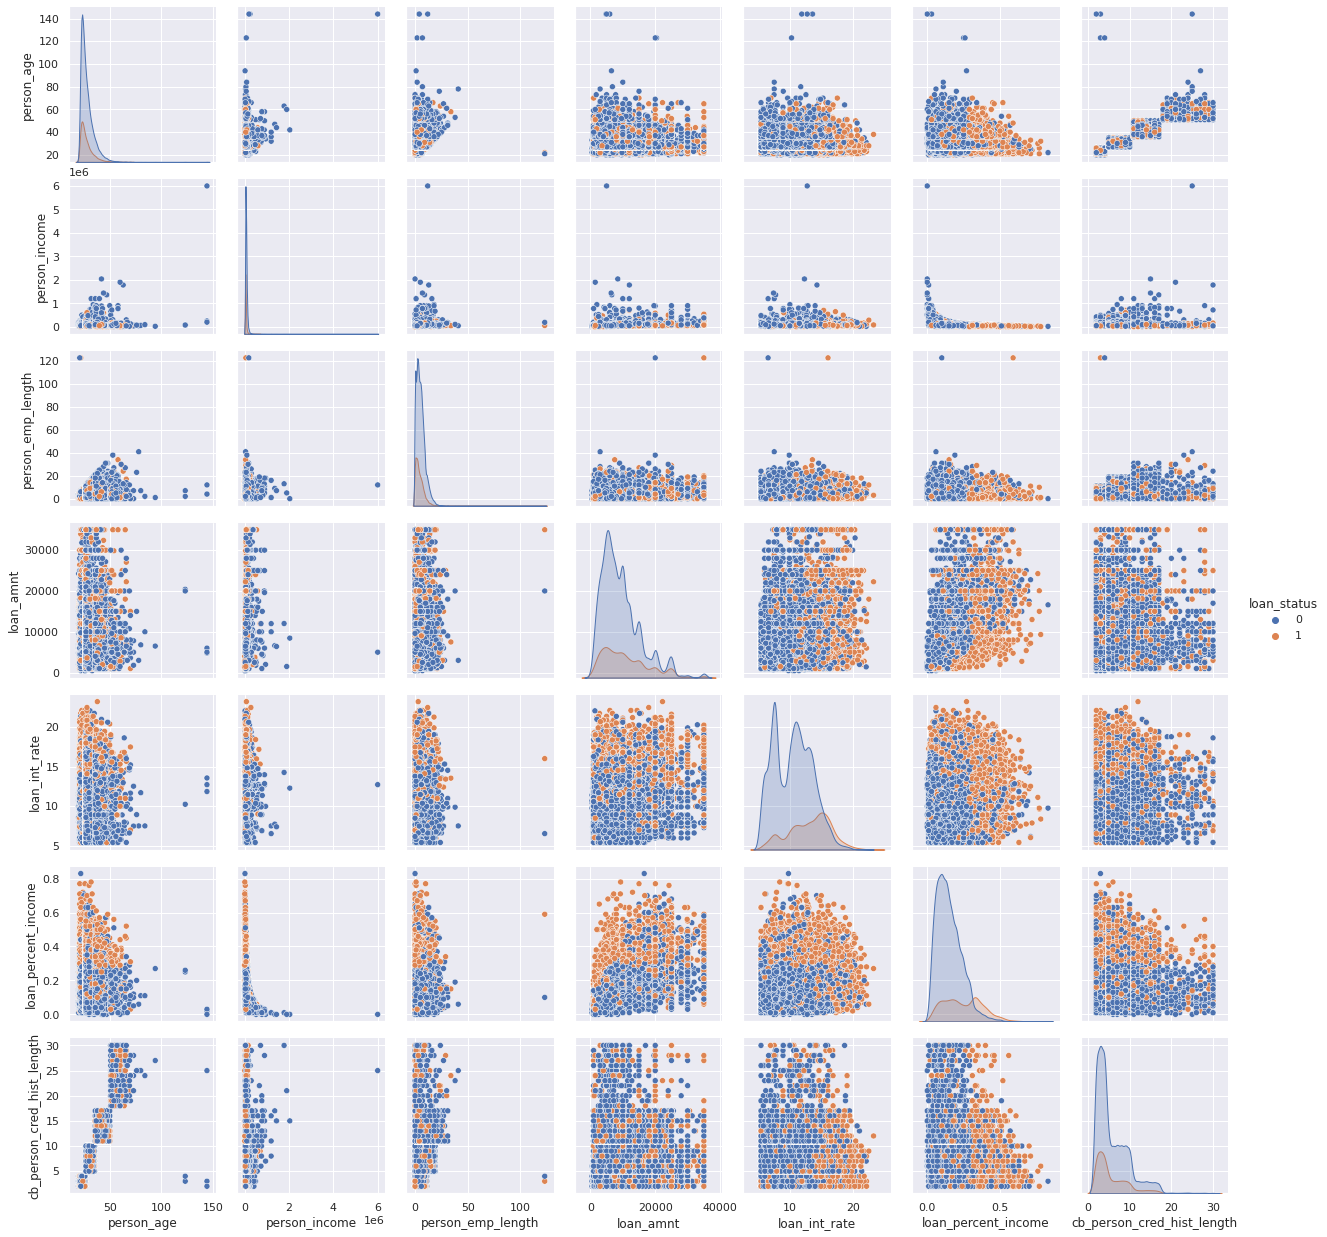

In [ ]:
sns.pairplot(df_num,hue="loan_status")

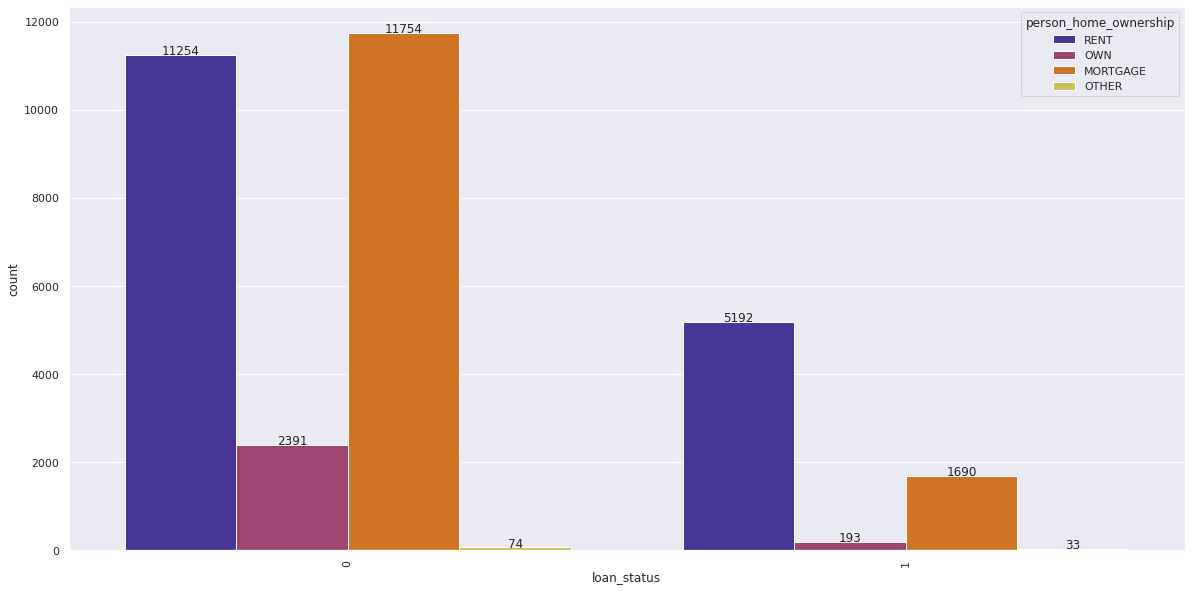

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='loan_status',hue="person_home_ownership",data=df, palette="CMRmap")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

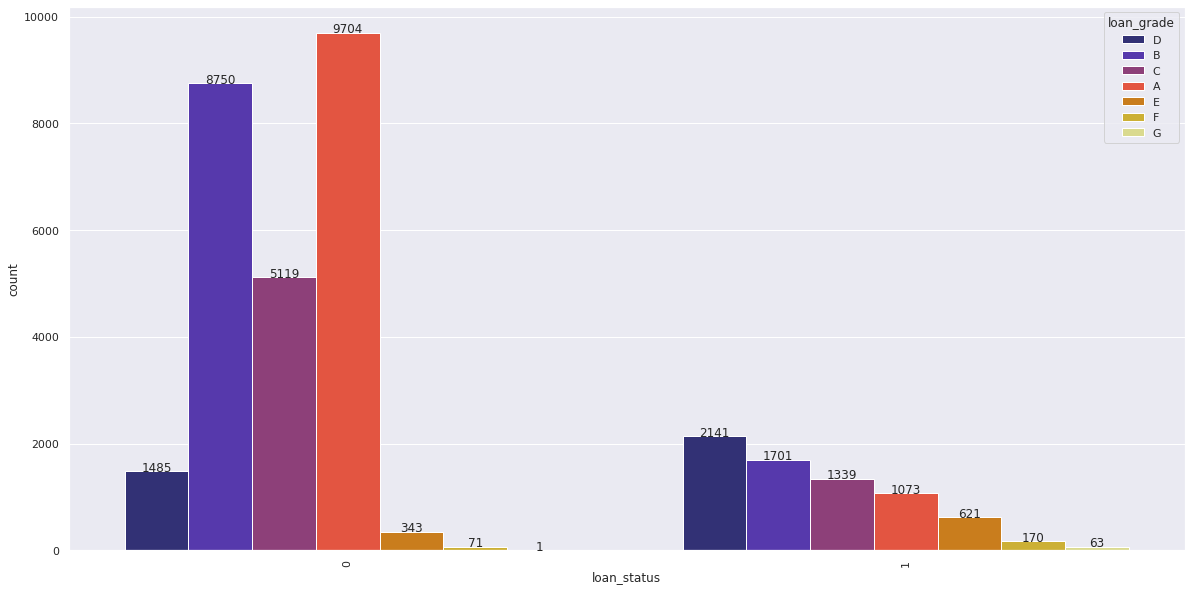

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='loan_status',hue="loan_grade",data=df, palette="CMRmap")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

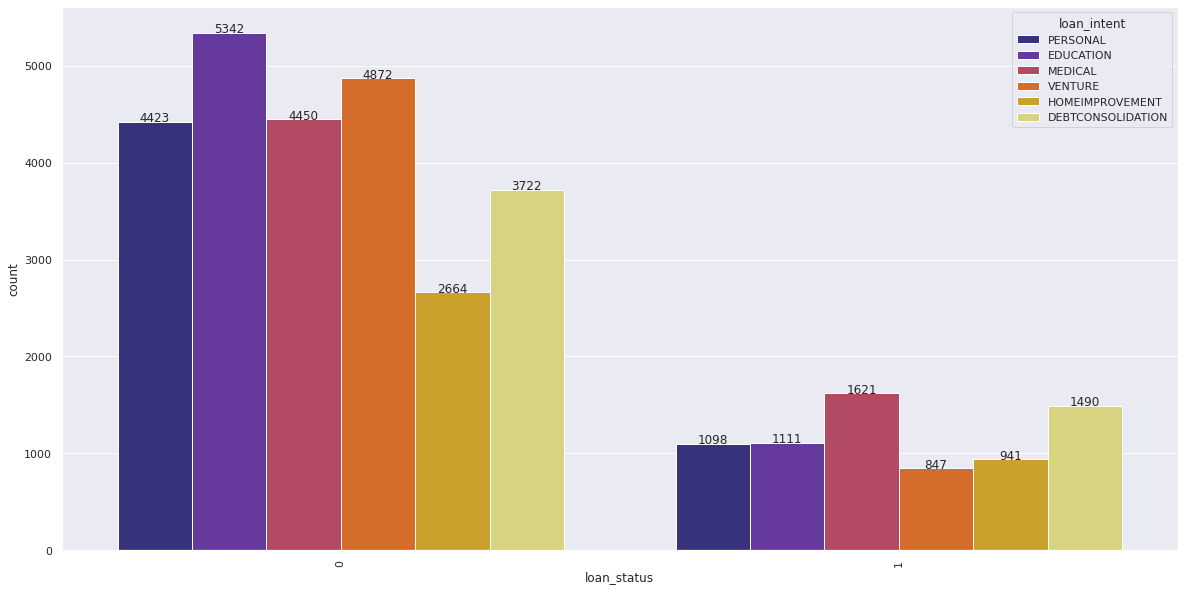

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='loan_status',hue="loan_intent",data=df, palette="CMRmap")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    

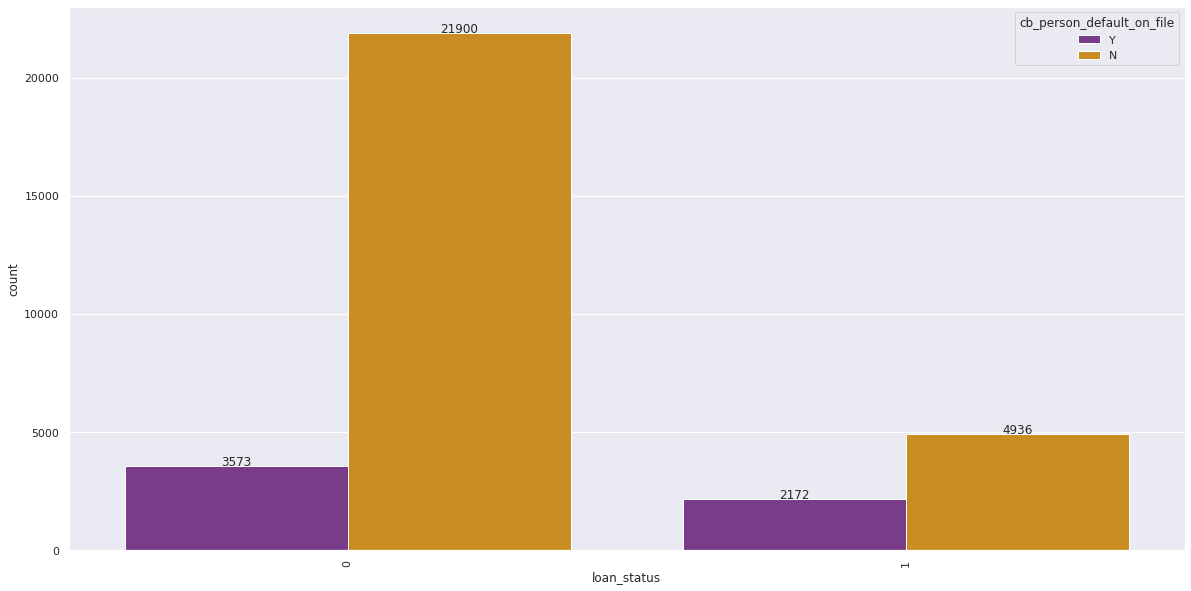

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='loan_status',hue="cb_person_default_on_file",data=df, palette="CMRmap" )
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [ ]:
cross_dei = pd.crosstab(index = df['loan_status'], columns = df['loan_percent_income'], normalize='columns').round(4) * 100

cross_dei

loan_percent_income,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.67,0.68,0.69,0.70,0.71,0.72,0.76,0.77,0.78,0.83
loan_status,,,,,,,,,,,,,,,,,,,,,
0,100.0,94.24,91.08,90.38,87.7,90.07,88.98,88.31,85.66,87.74,...,0.0,33.33,50.0,33.33,33.33,0.0,0.0,0.0,0.0,100.0
1,0.0,5.76,8.92,9.62,12.3,9.93,11.02,11.69,14.34,12.26,...,100.0,66.67,50.0,66.67,66.67,100.0,100.0,100.0,100.0,0.0


In [ ]:
pd.crosstab(index = df_cat['loan_intent'], columns = df_cat['loan_grade'])

cross_index = pd.crosstab(index = df_cat['loan_intent'], columns = df_cat['loan_grade'], 
            normalize='index').round(4) * 100

cross_index

loan_grade,A,B,C,D,E,F,G
loan_intent,,,,,,,
DEBTCONSOLIDATION,33.63,31.08,19.99,11.51,2.76,0.83,0.19
EDUCATION,33.69,31.40,21.01,10.18,2.87,0.71,0.14
HOMEIMPROVEMENT,31.23,30.93,19.22,13.51,3.97,0.89,0.25
MEDICAL,32.27,33.04,20.05,10.84,2.75,0.86,0.20
PERSONAL,33.18,32.84,18.95,11.65,2.66,0.54,0.18
VENTURE,33.80,32.72,19.30,10.16,3.11,0.66,0.24


In [ ]:
cross_df = pd.crosstab(index = df_cat['loan_intent'], columns = df_cat['loan_grade'], 
            margins = True, margins_name= "Total", normalize = True).round(4) * 100

cross_df

loan_grade,A,B,C,D,E,F,G,Total
loan_intent,,,,,,,,
DEBTCONSOLIDATION,5.38,4.97,3.20,1.84,0.44,0.13,0.03,16.00
EDUCATION,6.67,6.22,4.16,2.02,0.57,0.14,0.03,19.81
HOMEIMPROVEMENT,3.46,3.42,2.13,1.49,0.44,0.10,0.03,11.06
MEDICAL,6.01,6.16,3.74,2.02,0.51,0.16,0.04,18.63
PERSONAL,5.62,5.56,3.21,1.97,0.45,0.09,0.03,16.95
VENTURE,5.93,5.74,3.39,1.78,0.55,0.12,0.04,17.55
Total,33.08,32.08,19.82,11.13,2.96,0.74,0.20,100.00


In [ ]:
cross_col = pd.crosstab(index = df_cat['loan_intent'], columns = df_num['loan_status'], 
            normalize='index').round(4) * 100

cross_col

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,71.41,28.59
EDUCATION,82.78,17.22
HOMEIMPROVEMENT,73.90,26.10
MEDICAL,73.30,26.70
PERSONAL,80.11,19.89
VENTURE,85.19,14.81


In [ ]:
cross_col = pd.crosstab(index = df_cat['loan_intent'], columns = df_num['loan_status'], 
            normalize='index').round(4) * 100

cross_col

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,71.41,28.59
EDUCATION,82.78,17.22
HOMEIMPROVEMENT,73.90,26.10
MEDICAL,73.30,26.70
PERSONAL,80.11,19.89
VENTURE,85.19,14.81


In [ ]:
pd.crosstab(index = df_cat['cb_person_default_on_file'], columns = df_num['loan_status'], 
            normalize='index').round(4) * 100

loan_status,0,1
cb_person_default_on_file,,
N,81.61,18.39
Y,62.19,37.81


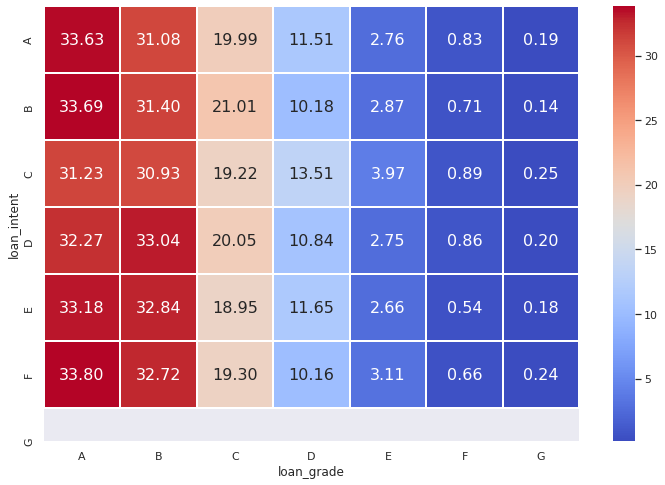

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(cross_index,xticklabels=cross_index.columns,yticklabels=cross_index.columns, cmap='coolwarm',linewidths=.1, annot=True, annot_kws={"size": 16}, fmt='.2f');


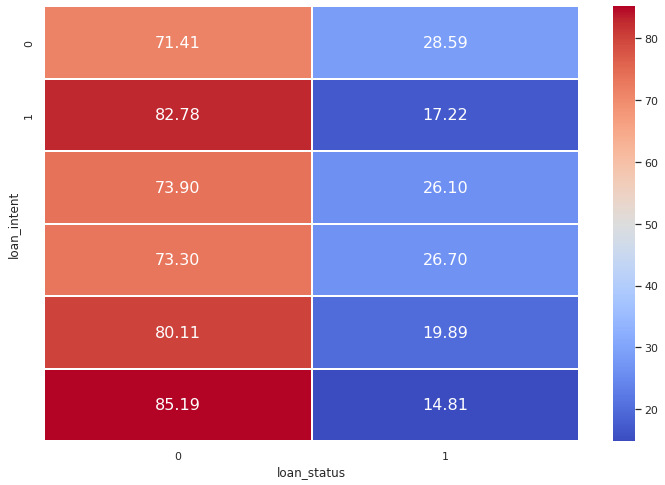

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(cross_col,xticklabels=cross_col.columns,yticklabels=cross_col.columns, cmap='coolwarm',linewidths=.1, annot=True, annot_kws={"size": 16}, fmt='.2f');

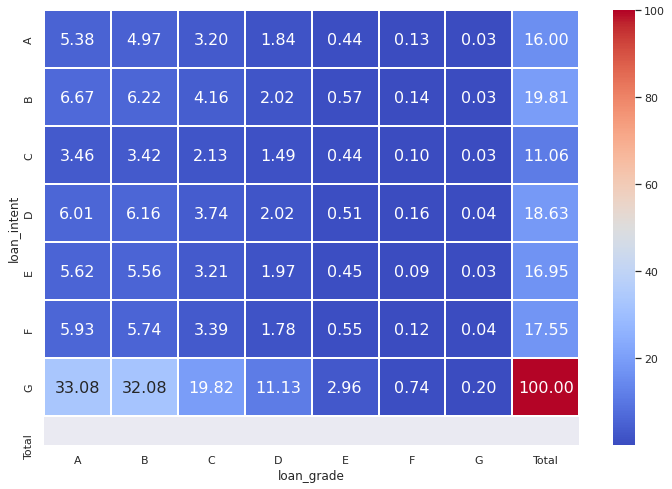

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(cross_df,xticklabels=cross_df.columns,yticklabels=cross_df.columns, cmap='coolwarm',linewidths=.1, annot=True, annot_kws={"size": 16}, fmt='.2f');

In [ ]:
cross_his = pd.crosstab(index = df['cb_person_cred_hist_length'], columns = df_num['loan_status'], 
          normalize='index').round(4) * 100

cross_his

loan_status,0,1
cb_person_cred_hist_length,,
2,76.43,23.57
3,77.72,22.28
4,77.69,22.31
5,79.37,20.63
6,79.21,20.79
7,80.06,19.94
8,78.65,21.35
9,79.16,20.84
10,79.73,20.27


<AxesSubplot:xlabel='cb_person_cred_hist_length'>

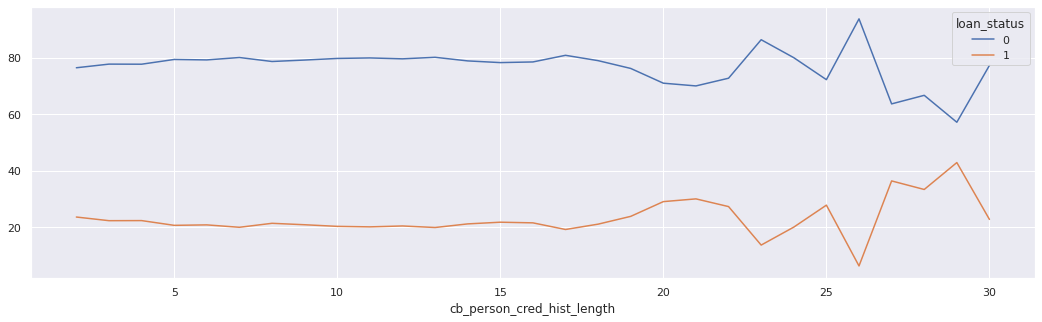

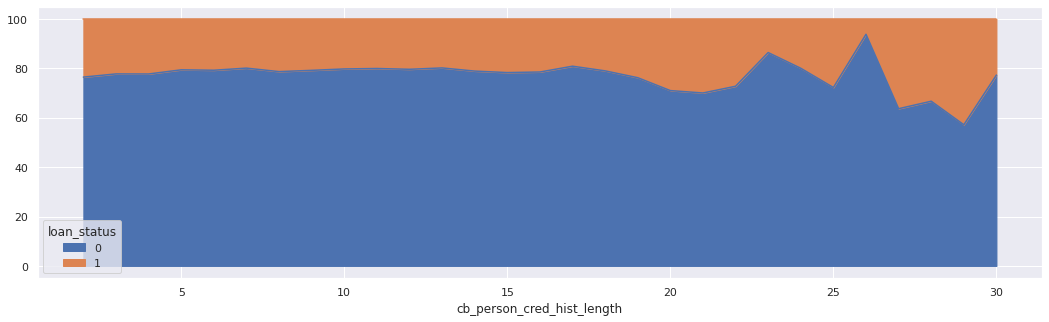

In [ ]:
cross_his.plot(kind = "line")

cross_his.plot(kind = "area")

In [ ]:
corr_matrix = df.corr(method = "pearson" )

corr_matrix.style.background_gradient(cmap='coolwarm')

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


# Categorical - Numeric

<AxesSubplot:title={'center':'Age by Ownership'}, xlabel='person_home_ownership', ylabel='person_age'>

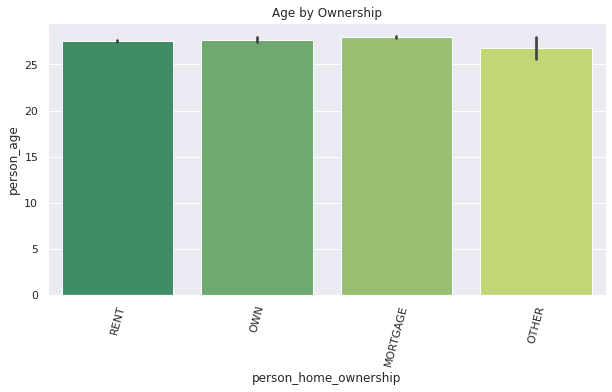

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=75)
plt.title("Age by Ownership")

sns.barplot(x = df_cat["person_home_ownership"], y = df_num["person_age"], palette="summer")

<AxesSubplot:title={'center':'Reletionship between Income and Loan Grade'}, xlabel='loan_grade', ylabel='person_income'>

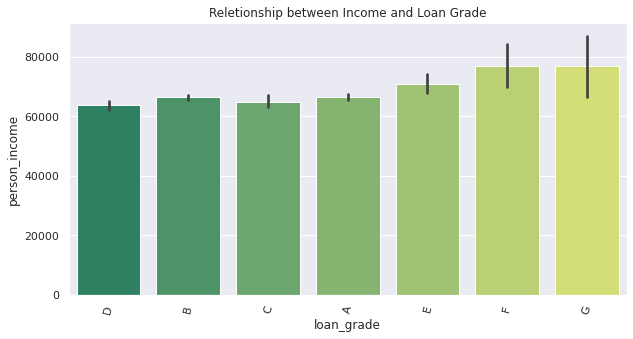

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=75)
plt.title("Reletionship between Income and Loan Grade")

sns.barplot(x = df_cat["loan_grade"], y = df_num["person_income"], palette="summer")

<AxesSubplot:title={'center':'Reletionship between Income and Previous Default'}, xlabel='cb_person_default_on_file', ylabel='person_income'>

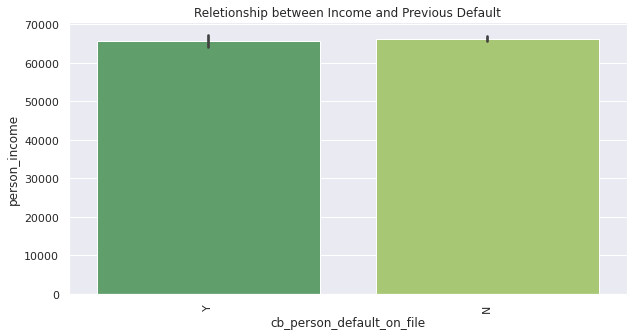

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("Reletionship between Income and Previous Default")

sns.barplot(x = df_cat["cb_person_default_on_file"], y = df_num["person_income"], palette="summer")